In [1]:
# 自己设置event事件，并导出为带该事件的fif文件
# https://mne.tools/stable/auto_tutorials/raw/plot_30_annotate_raw.html#sphx-glr-auto-tutorials-raw-plot-30-annotate-raw-py
import numpy as np
import pandas as pd
from mne.io import read_raw_fif
import mne
from datetime import timedelta

In [7]:
raw = read_raw_fif("/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss.fif",preload=True)

Opening raw data file /Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss.fif...
    Range : 17000 ... 496999 =     17.000 ...   496.999 secs
Ready.
Reading 0 ... 479999  =      0.000 ...   479.999 secs...


<ipython-input-7-a8bec9b7c3ae>:1: RuntimeWarning: This filename (/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif("/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss.fif",preload=True)


In [40]:
# raw.info['ch_names'] 

#  'STI101',
#  'STI201',
#  'STI301']

In [4]:
events = pd.read_csv("/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_MarkerFile-bst.txt",header=None)

In [5]:
# 标记的spike事件 
events

,0,1,2
0,spike,31.926,0
1,spike,47.610,0
2,spike,55.081,0
3,spike,70.258,0
4,spike,73.494,0
5,spike,79.761,0
6,spike,80.386,0
7,spike,85.830,0
8,spike,94.389,0
9,spike,134.203,0


In [8]:
sfreq = raw.info['sfreq']
sfreq

1000.0

In [11]:
# convert event for mne
# (onset,pre event_id,event_id) as. int

mne_events = [[]]
# mne_events[:,] 

onset = events.iloc[:,1].to_numpy() * sfreq
onset = onset.astype(int)
spike_event_id = [10001] * len(onset)
pre_event_id = [0] * len(onset)
print("onset:",onset)

print("spike_event_id:",spike_event_id)

mne_events = list(zip(onset,pre_event_id,spike_event_id))
mne_events

onset: [ 31926  47610  55081  70258  73494  79761  80386  85830  94389 134203
 140992 144688 147296 167947 172314 216726 225676 244143 288719 303938
 405255]
spike_event_id: [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001]


[(31926, 0, 10001),
 (47610, 0, 10001),
 (55081, 0, 10001),
 (70258, 0, 10001),
 (73494, 0, 10001),
 (79761, 0, 10001),
 (80386, 0, 10001),
 (85830, 0, 10001),
 (94389, 0, 10001),
 (134203, 0, 10001),
 (140992, 0, 10001),
 (144688, 0, 10001),
 (147296, 0, 10001),
 (167947, 0, 10001),
 (172314, 0, 10001),
 (216726, 0, 10001),
 (225676, 0, 10001),
 (244143, 0, 10001),
 (288719, 0, 10001),
 (303938, 0, 10001),
 (405255, 0, 10001)]

In [12]:
# method1: add spike event
# https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.add_events
raw.add_events(mne_events,'STI101')

In [84]:
raw.save('/Volumes/R/MEG/sample_meg_raw_spike.fif',overwrite=True)

Overwriting existing file.
Writing /Volumes/R/MEG/sample_meg_raw_spike.fif


<ipython-input-84-07e2bce10eb7>:1: RuntimeWarning: This filename (/Volumes/R/MEG/sample_meg_raw_spike.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw.save('/Volumes/R/MEG/sample_meg_raw_spike.fif',overwrite=True)


Closing /Volumes/R/MEG/sample_meg_raw_spike.fif
[done]


In [85]:
raw_eve = read_raw_fif("/Volumes/R/MEG/sample_meg_raw_spike.fif")

Opening raw data file /Volumes/R/MEG/sample_meg_raw_spike.fif...


<ipython-input-85-c03e8cad4e04>:1: RuntimeWarning: This filename (/Volumes/R/MEG/sample_meg_raw_spike.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_eve = read_raw_fif("/Volumes/R/MEG/sample_meg_raw_spike.fif")


    Range : 17000 ... 496999 =     17.000 ...   496.999 secs
Ready.


In [89]:
mne.find_events(raw_eve, stim_channel='STI101')

6 events found
Event IDs: [10001]


array([[ 31926,      0,  10001],
       [ 47610,      0,  10001],
       [ 55081,      0,  10001],
       [ 73494,      0,  10001],
       [ 94389,      0,  10001],
       [134203,      0,  10001]])

In [90]:
mne_events

[(31926, 0, 10001),
 (47610, 0, 10001),
 (55081, 0, 10001),
 (73494, 0, 10001),
 (94389, 0, 10001),
 (134203, 0, 10001)]

In [13]:
# method2: add spike annotation
# https://mne.tools/stable/auto_tutorials/raw/plot_30_annotate_raw.html#sphx-glr-auto-tutorials-raw-plot-30-annotate-raw-py
# “”“
# Notice that orig_time is None, because we haven’t specified it. In those cases, when you add the annotations to a Raw object, 
# it is assumed that the orig_time matches the time of the first sample of the recording, so orig_time will be set to
# match the recording measurement date (raw.info['meas_date']).
# ”“”
raw.info['meas_date']
orig_time = raw.annotations.orig_time
orig_time

datetime.datetime(2017, 3, 2, 3, 14, 24, 980120, tzinfo=datetime.timezone.utc)

In [14]:
meas_date = raw.info['meas_date']
print("meas_date:",meas_date)
orig_time = raw.annotations.orig_time
print(meas_date == orig_time)

meas_date: 2017-03-02 03:14:24.980120+00:00
True


In [15]:
# 找到数据记录的onset，即在记录之前，系统已经开始计数。
# Since the example data comes from a Neuromag system that starts counting sample numbers before the recording begins,
time_of_first_sample = raw.first_samp / raw.info['sfreq']
time_of_first_sample

17.0

In [18]:
time_format = '%Y-%m-%d %H:%M:%S.%f'
new_orig_time = (meas_date + timedelta(seconds=0)).strftime(time_format)
print(new_orig_time)

2017-03-02 03:14:24.980120


In [19]:
# later_annot = mne.Annotations(onset=[3, 5, 7],
#                               duration=[1, 0.5, 0.25],
#                               description=['DDD', 'EEE', 'FFF'],
#                               orig_time=new_orig_time)

onsets = (onset - 150)/sfreq
duration = [0.3] * len(onset)
print("onsets:",onsets)
spike_event_name = ['spike'] * len(onset)
spike_annot = mne.Annotations(onset=onsets,
                           duration=duration,
                           description=spike_event_name,
                           orig_time=new_orig_time)
print(spike_annot)
raw2 = raw.copy().set_annotations(spike_annot)
print(spike_annot.onset)
print(raw2.annotations.onset)

onsets: [ 31.776  47.46   54.931  70.108  73.344  79.611  80.236  85.68   94.239
 134.053 140.842 144.538 147.146 167.797 172.164 216.576 225.526 243.993
 288.569 303.788 405.105]
<Annotations | 21 segments: spike (21)>
[ 31.776  47.46   54.931  70.108  73.344  79.611  80.236  85.68   94.239
 134.053 140.842 144.538 147.146 167.797 172.164 216.576 225.526 243.993
 288.569 303.788 405.105]
[ 31.776  47.46   54.931  70.108  73.344  79.611  80.236  85.68   94.239
 134.053 140.842 144.538 147.146 167.797 172.164 216.576 225.526 243.993
 288.569 303.788 405.105]


In [20]:
raw2.save('/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif',overwrite=True)
raw_eve = read_raw_fif("/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif")

Writing /Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif


<ipython-input-20-bbd1fecfd0a6>:1: RuntimeWarning: This filename (/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw2.save('/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif',overwrite=True)


Closing /Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif
[done]
Opening raw data file /Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif...
    Range : 17000 ... 496999 =     17.000 ...   496.999 secs
Ready.


<ipython-input-20-bbd1fecfd0a6>:2: RuntimeWarning: This filename (/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_eve = read_raw_fif("/Volumes/Lexar/MEG/MEG2224_li_yi_20170302_EP_4_tsss_spike_annot.fif")


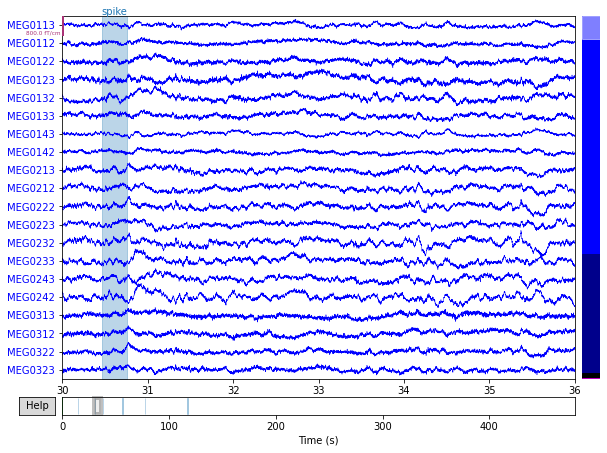

In [145]:
raw_eve.plot(start=30, duration=6);

In [140]:
raw_eve.annotations.onset

array([ 31.775999,  47.459999,  54.931   ,  73.344002,  94.238998,
       134.052994])

In [49]:
# P300 event
eeg_raw = mne.io.read_raw_bdf("/Users/reallo/Downloads/eeg-test/sub-001/sess/eeg/sub-001_task-P300_run-01_eeg.bdf",preload=True)
eeg_raw.info

Extracting EDF parameters from /Users/reallo/Downloads/eeg-test/sub-001/sess/eeg/sub-001_task-P300_run-01_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194047  =      0.000 ...   757.996 secs...


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 79 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 52.0 Hz
 meas_date: 2011-08-12 15:47:56 UTC
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
>

In [50]:
eeg_raw.info['ch_names']

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'GSR1',
 'GSR2',
 'Erg1',
 'Erg2',
 'Resp',
 'Plet',
 'Temp',
 'Status']

In [5]:
sfreq = eeg_raw.info['sfreq']
sfreq

256.0

In [23]:
# # extract the events array from the stim channel
events = mne.find_events(eeg_raw)
events

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
863 events found
Event IDs: [1 2 3 4 8]


array([[  1139,      0,      2],
       [  1346,      0,      2],
       [  1604,      0,      2],
       ...,
       [193483,      0,      1],
       [193644,      0,      2],
       [193897,      0,      2]])

In [37]:
# 脑电数据
evt_onset = np.around(events[:,0]/sfreq,decimals=3)
print(evt_onset[:10])

evt_duration = events[:,1]
print(evt_duration[:10])

evt_type = events[:,2]
print(evt_type[:10])

[ 4.449  5.258  6.266  7.328  8.352  9.273 10.27  11.312 12.34  13.359]
[0 0 0 0 0 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2]


In [56]:
# 脑磁数据
meg_raw = mne.io.read_raw_fif("/Users/reallo/Downloads/MEG2224_Li_yi_20170302_EP_1.fif",preload=True)
meg_raw.info
sfreq = meg_raw.info['sfreq']
events = mne.find_events(meg_raw,stim_channel=['STI101','STI201','STI301']) # 脑磁图事件通道名称：'STI101' 'STI201' 'STI301'
evt_onset = np.around((events[:, 0] - meg_raw.first_samp) / meg_raw.info['sfreq'],decimals=3) #剔除first_samp的数据（即未记录的前几秒脑磁数据被去掉）；
print(evt_onset[:20])

evt_duration = events[:,1]
print(evt_duration[:20])

evt_type = events[:,2]
print(evt_type[:20])



Opening raw data file /Users/reallo/Downloads/MEG2224_Li_yi_20170302_EP_1.fif...
    Read a total of 7 projection items:
        mag_ssp_supine.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_supine.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_supine.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_supine.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_supine.fif : PCA-v5 (1 x 306)  idle
        grad_ssp_supine.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_supine.fif : PCA-v2 (1 x 306)  idle
    Range : 18000 ... 501999 =     18.000 ...   501.999 secs
Ready.
Reading 0 ... 483999  =      0.000 ...   483.999 secs...


<ipython-input-56-8123e375dfe3>:2: RuntimeWarning: This filename (/Users/reallo/Downloads/MEG2224_Li_yi_20170302_EP_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  meg_raw = mne.io.read_raw_fif("/Users/reallo/Downloads/MEG2224_Li_yi_20170302_EP_1.fif",preload=True)


11610 events found
Event IDs: [1 2 3 4 5 6 7 8 9]
[0.027 0.045 0.064 0.083 0.102 0.12  0.139 0.158 0.177 0.402 0.42  0.439
 0.458 0.477 0.496 0.514 0.533 0.552 0.777 0.796]
[0 1 2 3 4 5 6 7 8 0 1 2 3 4 5 6 7 8 0 1]
[1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2]


<ipython-input-56-8123e375dfe3>:5: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(meg_raw,stim_channel=['STI101','STI201','STI301']) # 脑磁图事件通道名称：'STI101' 'STI201' 'STI301'


In [52]:
events[:, 0]

array([ 18027,  18045,  18064, ..., 501740, 501758, 501777])

In [44]:
evt_type

array([], dtype=int32)